In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#to perform non parametric tests

from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

#to perform parametric tests

from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

#To perform Correlation

from scipy.stats import pearsonr
  
#To check normality

from scipy.stats import kurtosis,skew

%matplotlib inline

In [17]:
dataset = pd.read_csv("E:\\python\\general_data.csv")
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
df=dataset.dropna()
df.drop_duplicates()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [19]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [23]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,65061.702419,2.693291,15.210634,8.0,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,47142.310175,2.497832,3.663007,0.0,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83790.000000,4.000000,18.000000,8.0,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000


In [24]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
dataset1

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [25]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,8,10.0,2,5,0,2


In [32]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].var()
dataset1
print

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [29]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()
dataset1

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

With refrence to above calculation it is found that all variables show positive skewness 

Only Eductaion is showing negative skewness

In [30]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset1

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

With refrence to above calculation it is found that Age, DistanceFromHome, Education, PercentSalaryHike are showing platykurtic


{'whiskers': [<matplotlib.lines.Line2D at 0x1ed84421d88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed84431fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed84421a48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed83d05648>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed8443ad88>],
 'means': []}

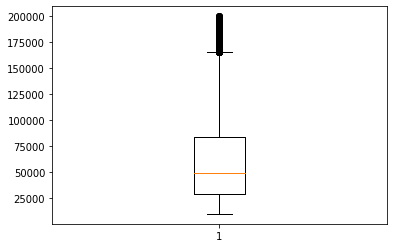

In [33]:
plt.boxplot(dataset.MonthlyIncome)

The above boxplot shows that there are outliers in Monthly Income and right skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed844d5e88>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed844d7b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed844d5908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed844df688>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed844dfbc8>],
 'means': []}

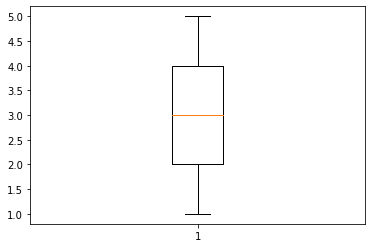

In [34]:
plt.boxplot(dataset.Education)

The above boxplot shows that there are no outliers in Education

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed84544f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed8454bd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed84544a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed84550848>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed84550d88>],
 'means': []}

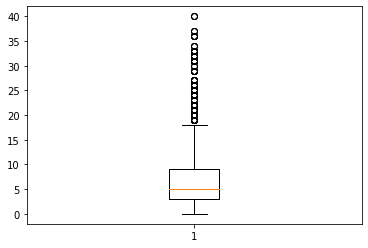

In [35]:
plt.boxplot(dataset.YearsAtCompany)

The above boxplot shows that there are outliers in Years at company and right skewed

(array([ 508.,    0.,  842.,    0.,    0., 1701.,    0., 1188.,    0.,
         143.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

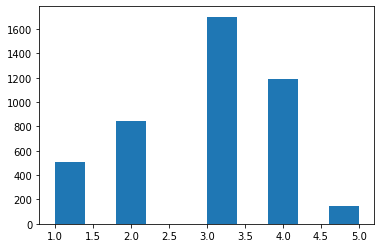

In [47]:
plt.hist(df.Education)



Education is negatively skewed and shows platykrutic

(array([1402., 1405.,  936.,  228.,  134.,  172.,   48.,   18.,   27.,
          12.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

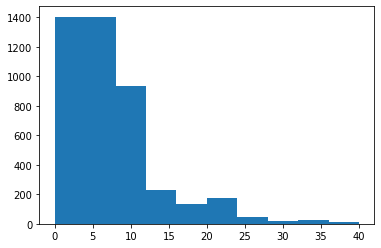

In [48]:
plt.hist(df.YearsAtCompany)


Years at company is positively skewed and leptokrutic

(array([1088., 1041.,  864.,  324.,  326.,  167.,  156.,   54.,  161.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

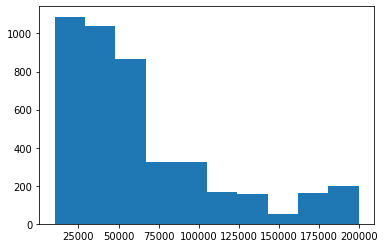

In [49]:

plt.hist(df.MonthlyIncome)

Monthly income is bimodule, positively skewed and leptokrutic

## Statstical Tests

In [50]:
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True )

E:\LearnPython\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,0.160885,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,0.367467,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [53]:
attydata = df.loc[df['Attrition'] == 1]
attndata = df.loc[df['Attrition'] == 0]

### scipy.stats.mannwhitneyu() Test

In [54]:
# Null Hypothesis: there is no significant difference in the current salary between employees
# in the company and left the company
# Alternative Hypothesis: There is a difference in the current salary between employees
# in the company and left the company

stats, p = mannwhitneyu(attydata.MonthlyIncome, attndata.MonthlyIncome)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")

1249573.5 0.06508807631576838
Null Hypothesis is accepted


In [55]:
attydata["EducationField"].replace({"Life Sciences":0, "Medical":1, "Other":2}, inplace=True)

dataLS = attydata.loc[attydata["EducationField"]==0]
dataM = attydata.loc[attydata["EducationField"]==1]
dataO = attydata.loc[attydata["EducationField"]==2]

E:\LearnPython\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### scipy.stats.kruskal

In [56]:
# Null Hypothesis: there is no significant difference in the current salary between employees whose education is 
# Life Science, Medical and Others
# Alternative Hypothesis: There is a difference in the current salary between employees whose ducation is 
# Life Science, Medical and Others

stats, p = kruskal(dataLS.MonthlyIncome, dataM.MonthlyIncome, dataO.MonthlyIncome)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")

3.7713008825857095 0.15173033565021432
Null Hypothesis is accepted


### scipy.stats.chis2_contigency

In [58]:
chitable = pd.crosstab(df.Attrition,df.Gender)
chitable

Gender,Female,Male
Attrition,,
0,1488,2189
1,268,437


In [59]:
#Null Hypothesis: There is no dependency of attrition over gender
#Alternative Hypothesis: There is dependency of attrition over gender
stats,p,dof,expected = chi2_contingency(chitable)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")

1.3825823839528295 0.23966176275638887
Null Hypothesis is accepted


### Two Sample Independent T test

In [60]:
#Null Hypothesis: There is no significant difference in the average means of age between attrition and non attrition employess
#ALternate Hypothesis: There is Aa significant difference in the average means of age between attrition and non attrition employess

stats,p = ttest_ind(attydata.Age, attndata.Age)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")


-10.617111568458819 5.126598219406314e-26
Null Hypothesis is regected


## Correlation

### Correlation between Attrition and DistanceFromHome

Correlation value is -0.009448638515156248
p-value is 0.5317715668019558
Null Hypothesis is accepted


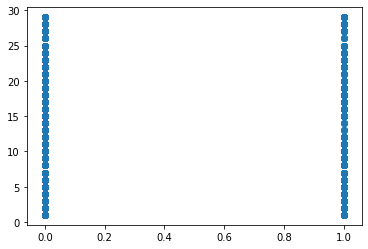

In [64]:
stats,p= pearsonr(df.Attrition,df.DistanceFromHome)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.DistanceFromHome)

As r = -0.009, there’s low negative correlation between Attrition and DistanceFromHomeAs the P value of 0.531 is > 0.05, we are accepting H0 and hence there’s no significant correlation between Attrition & DistanceFromHome

### Correlation between Attrition and Education

Correlation value is -0.017106307050278723
p-value is 0.25757539308157945
Null Hypothesis is accepted


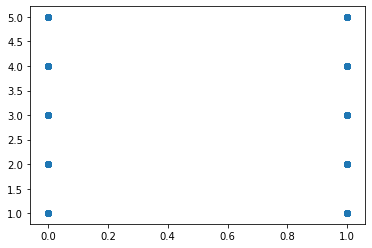

In [65]:
stats,p= pearsonr(df.Attrition,df.Education)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.Education)
    

As r = -0.017, there’s low negative correlation between Attrition and Education 
As the P value of 0.257 is > 0.05, we are accepting H0 and hence there’s no significant correlation between Attrition & Education

### Correlation between Attrition and MonthlyIncome

Correlation value is -0.030160293808460664
p-value is 0.045890862744719166
Null Hypothesis is regected


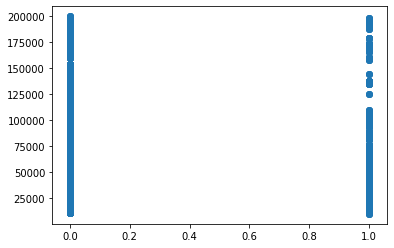

In [66]:
stats,p= pearsonr(df.Attrition,df.MonthlyIncome)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.MonthlyIncome)
    

As r = -0.030, there’s low negative correlation between Attrition and MOnthly Income
As the P value of 0.04 is < 0.05, we are regecting H0 and hence there’s no significant correlation between Attrition & Monthly Income

### Correlation between Attrition and YearsAtCompany 

Correlation value is -0.1330026184252154
p-value is 9.476118084836507e-19
Null Hypothesis is regected


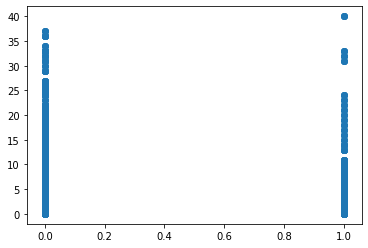

In [69]:
stats,p= pearsonr(df.Attrition,df.YearsAtCompany)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.YearsAtCompany)
    

As r = -0.133, there’s low negative correlation between Attrition and Years at company
As the P value of 9.47 is > 0.05, we are accepting H0 and hence there’s significant correlation between Attrition & Years at Company

In [75]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object